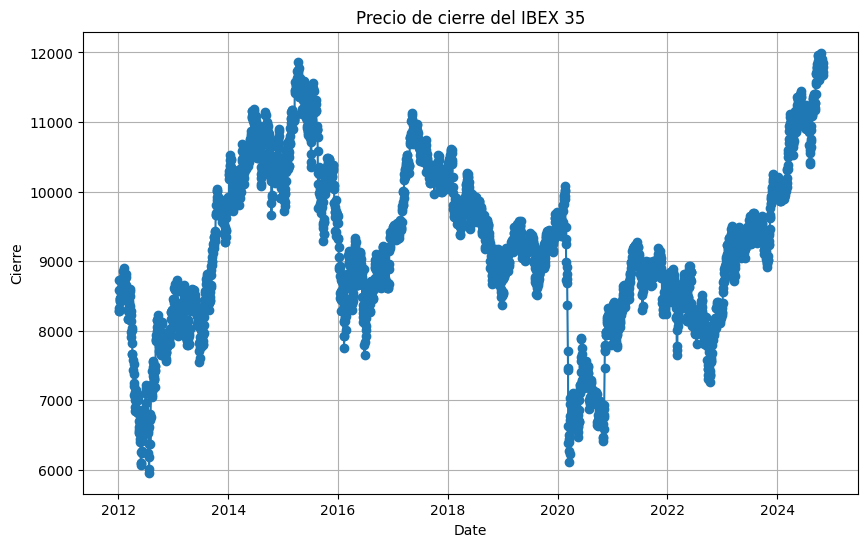

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('ibex_clean.csv')

# Convertir la columna 'Date' a tipo datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')
df.set_index('Date', inplace=True)



# Filtrar todas las filas donde 'Close' no sea nulo o NaN
df_filtered = df.dropna(subset=['Close'])

# Graficar la columna 'Close'
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Close'], marker='o', linestyle='-')
plt.title('Precio de cierre del IBEX 35')
plt.xlabel('Date')
plt.ylabel('Cierre')
plt.grid(True)
plt.show()

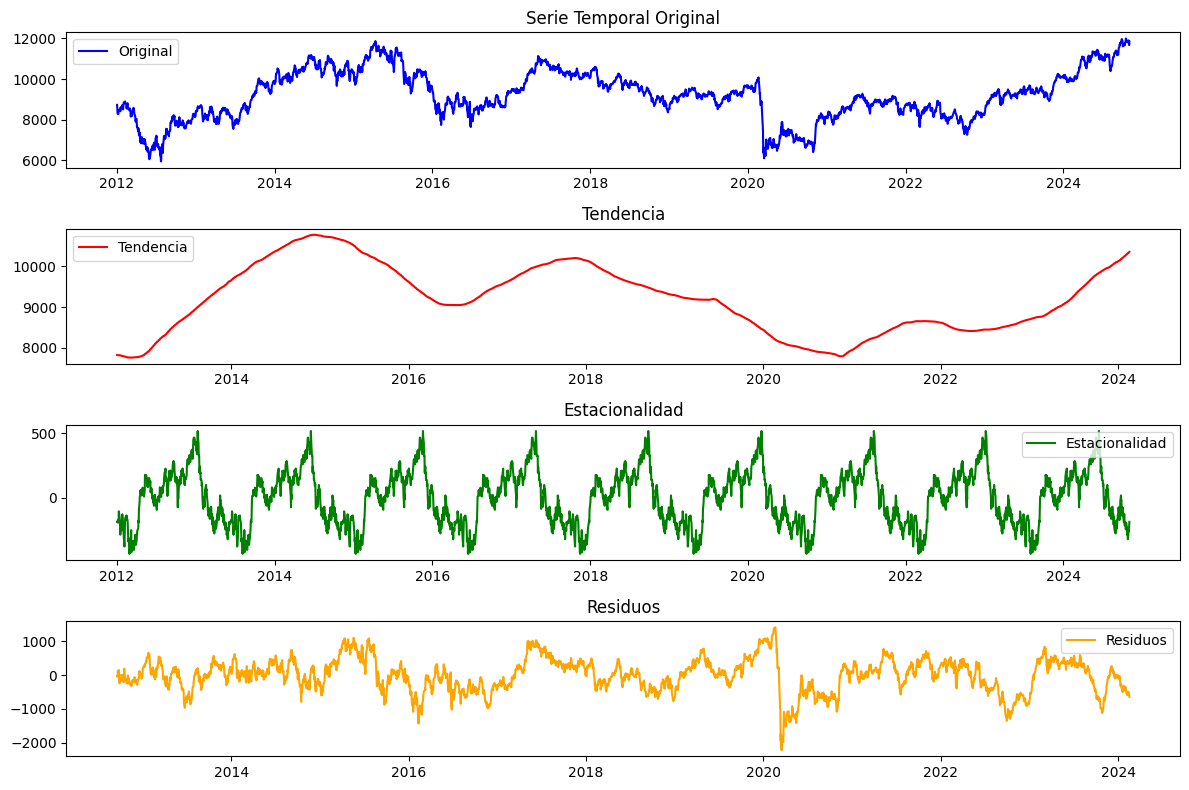

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Descomposición de la serie temporal
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)

# Obtención de las componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Graficar las componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend()
plt.title('Serie Temporal Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia', color='red')
plt.legend()
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residuals, label='Residuos', color='orange')
plt.legend()
plt.title('Residuos')

plt.tight_layout()
plt.show()




In [12]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
train_size = int(len(df_filtered) * 0.8)
train, test = df_filtered.iloc[:train_size], df_filtered.iloc[train_size:]

# Ajustar el modelo SARIMA automáticamente

In [13]:
import pandas as pd
from pmdarima import auto_arima

# Establecer la frecuencia de los datos (por ejemplo, 'D' para diario, 'M' para mensual, 'Y' para anual)
frequency = 'M'  # Por ejemplo, si los datos son mensuales

# Definir el número de períodos en una temporada (ajustar según sea necesario)
seasonal_periods = 12  # Por ejemplo, si los datos son mensuales y tienen estacionalidad anual

# Supongamos que df contiene múltiples columnas y deseamos modelar solo una de ellas
serie_temporal = df['Close']  # Reemplaza 'nombre_de_la_columna' con el nombre de la columna que deseas modelar

# Definir el rango de hiperparámetros
start_p = 3
d = None
start_q = 0
start_P = 0
D = None
start_Q = 1
max_p = 3
max_d = 2  # Ahora establecemos max_d como un entero positivo
max_q = 3
max_P = 0
max_D = 1  # Ya que se trata de una estacionalidad diferenciada (en la mayoría de los casos, D=1)
max_Q = 1

# Utilizar auto_arima para buscar automáticamente los mejores hiperparámetros minimizando el MAE
model = auto_arima(serie_temporal, seasonal=True, m=seasonal_periods, start_p=start_p, d=d, start_q=start_q,
                   start_P=start_P, D=D, start_Q=start_Q, max_p=max_p, max_d=max_d, max_q=max_q, max_P=max_P,
                   max_D=max_D, max_Q=max_Q, stepwise=False, suppress_warnings=True, trace=True,
                   scoring='mae')

# Imprimir los mejores hiperparámetros encontrados por auto_arima
print("Mejores hiperparámetros SARIMA:", model.get_params())





 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=40142.104, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=40141.030, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=40143.534, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=40142.578, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=40144.259, Time=0.18 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=40143.320, Time=0.66 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=40146.234, Time=0.36 sec
 ARIMA(0,1,3)(0,0,1)[12] intercept   : AIC=40145.294, Time=1.30 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=40143.507, Time=0.24 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=40142.558, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=40145.059, Time=0.94 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=40144.176, Time=1.36 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=40146.249, Time=1.48 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=40145.311, Time=5.73 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=40148

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Métricas del Modelo SARIMA: (2285804.2520011347, 1200.3725341810516, 1511.8876452968107, -0.6474358310322577)


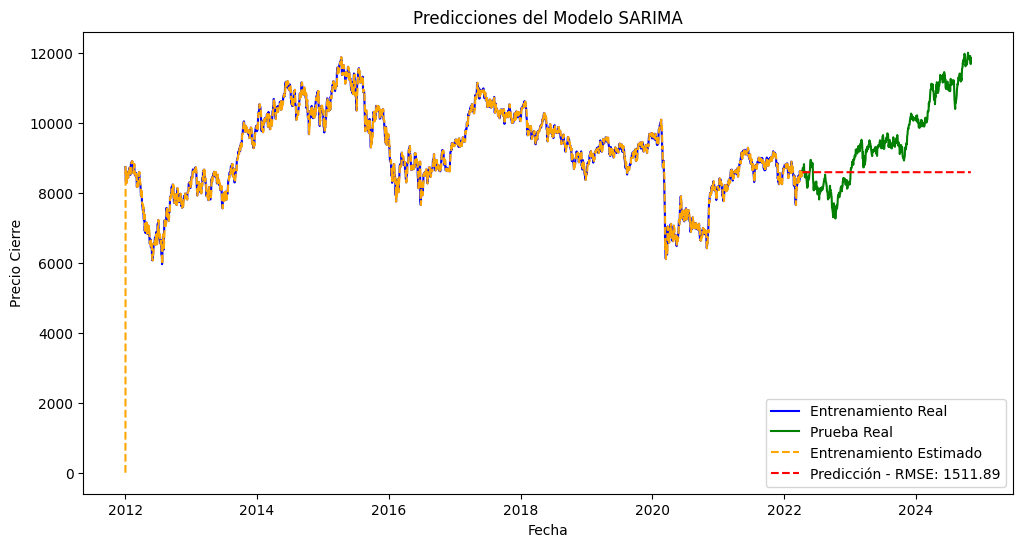

SARIMA - AIC: 32349.755068831022 BIC: 32373.246413531124


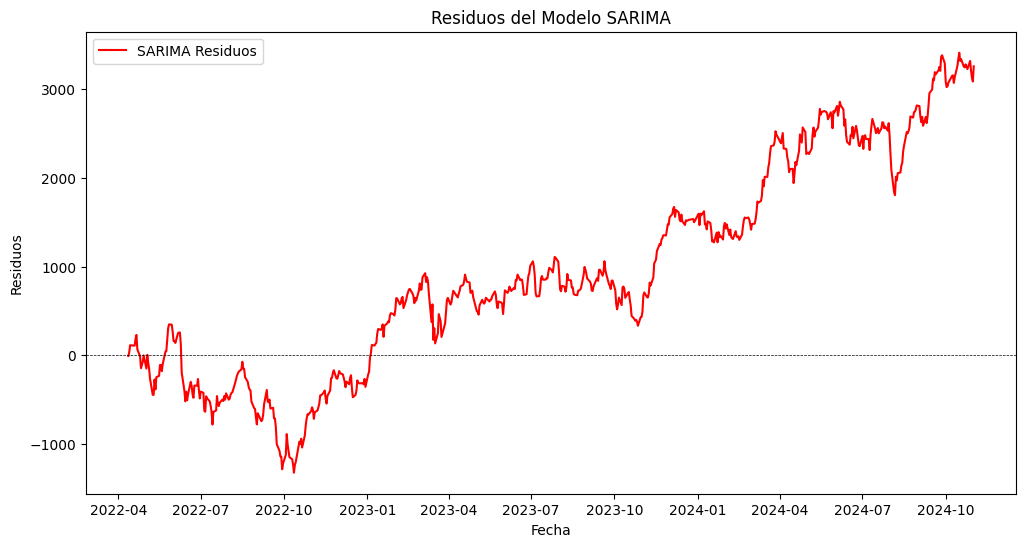

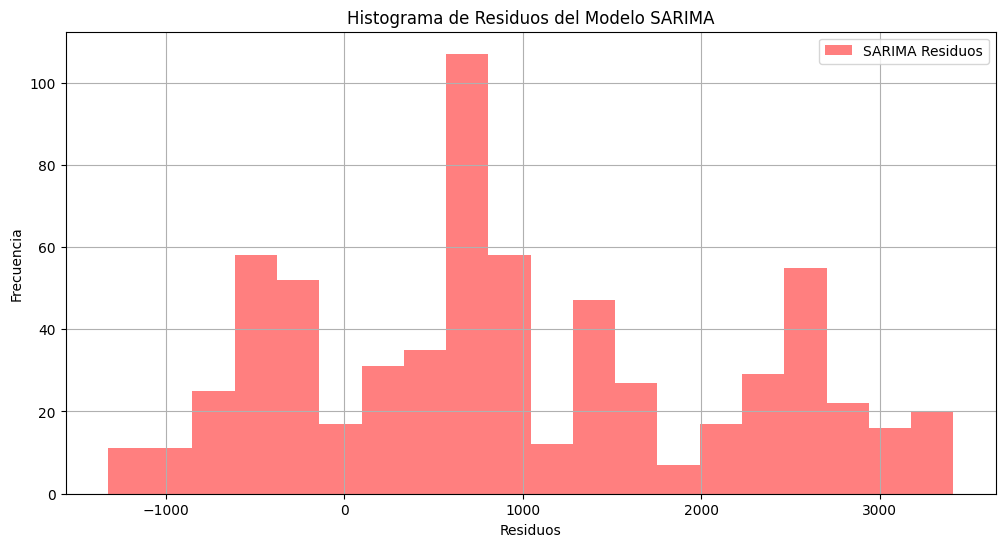

                Fecha  SARIMA Residuos
Date                                  
2022-04-12 2022-04-12        -6.628350
2022-04-13 2022-04-13        33.278963
2022-04-14 2022-04-14       114.561684
2022-04-19 2022-04-19       109.626602
2022-04-20 2022-04-20       185.177689
...               ...              ...
2024-10-28 2024-10-28      3319.866379
2024-10-29 2024-10-29      3211.166184
2024-10-30 2024-10-30      3130.866379
2024-10-31 2024-10-31      3088.465988
2024-11-01 2024-11-01      3258.866379

[657 rows x 2 columns]
Coeficiente de determinación R² en entrenamiento: 0.97
Coeficiente de determinación R² en prueba: -0.65


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ajustar el modelo SARIMA
sarima_model2 = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_fit2 = sarima_model2.fit()

# Predecir tanto en el conjunto de entrenamiento como de test para comparar el pasado real y estimado
train_predictions = sarima_fit2.predict(start=0, end=len(train) - 1, typ='levels')
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
sarima_predictions2.index = test.index
sarima_residuals2 = test['Close'] - sarima_predictions2

# Calcular métricas de validación
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calculamos las métricas para el conjunto de prueba
sarima_metrics2 = calcular_metricas(test['Close'], sarima_predictions2)

# Imprimir las métricas
print("Métricas del Modelo SARIMA:", sarima_metrics2)

# Graficar los resultados: pasado real, pasado estimado y predicciones
plt.figure(figsize=(12, 6))

# Graficar la serie real del conjunto de entrenamiento y de prueba
plt.plot(train.index, train['Close'], label='Entrenamiento Real', color='blue')
plt.plot(test.index, test['Close'], label='Prueba Real', color='green')

# Graficar las predicciones del entrenamiento y prueba
plt.plot(train.index, train_predictions, label='Entrenamiento Estimado', linestyle='--', color='orange')
plt.plot(test.index, sarima_predictions2, label=f'Predicción - RMSE: {sarima_metrics2[2]:.2f}', linestyle='--', color='red')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio Cierre')
plt.title('Predicciones del Modelo SARIMA')
plt.legend()
plt.show()

# Imprimir el AIC y BIC del modelo
print("SARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)

# Obtener los residuos del modelo
sarima_residuals2 = test['Close'] - sarima_predictions2

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(test.index, sarima_residuals2, label='SARIMA Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo SARIMA')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(12, 6))
plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5, label='SARIMA Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Fecha': test.index,
    'SARIMA Residuos': sarima_residuals2
})

# Mostrar la tabla de resultados de residuos
print(residuals_df)

# Calcular y mostrar el coeficiente R²
r2_train = r2_score(train['Close'], train_predictions)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {sarima_metrics2[3]:.2f}')



c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


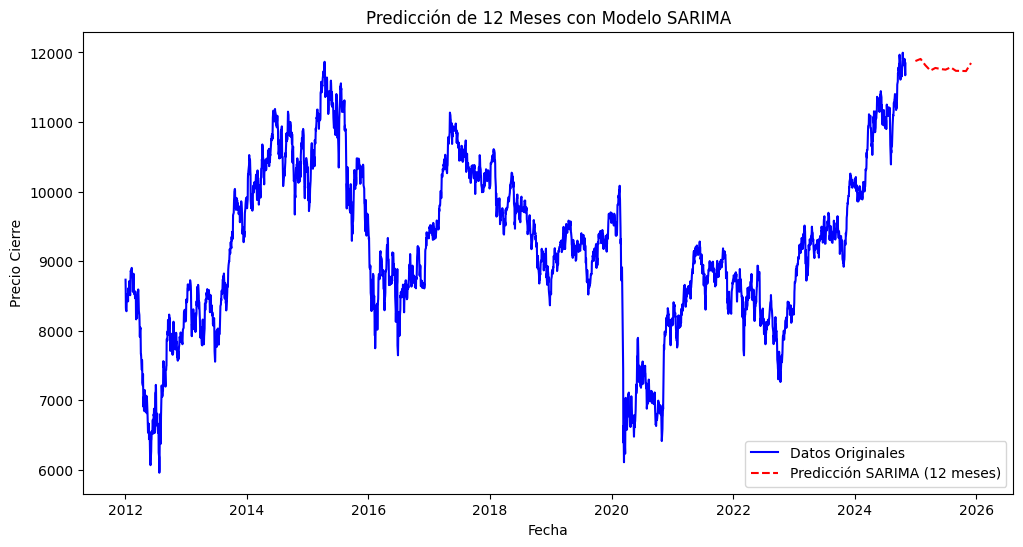

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
import numpy as np

# Asegúrate de que el índice de df sea un DatetimeIndex
df.index = pd.to_datetime(df.index)

# Ajustar el modelo SARIMA a todos los datos
sarima_model = SARIMAX(df['Close'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Generar las fechas futuras para la predicción de los próximos 12 meses
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Realizar la predicción de los próximos 12 meses
sarima_predictions_12months = sarima_fit.predict(start=len(df), end=len(df) + 11, typ='levels')
sarima_predictions_12months.index = future_dates

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_12months.index, sarima_predictions_12months, label='Predicción SARIMA (12 meses)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio Cierre')
plt.title('Predicción de 12 Meses con Modelo SARIMA')
plt.legend()
plt.show()


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


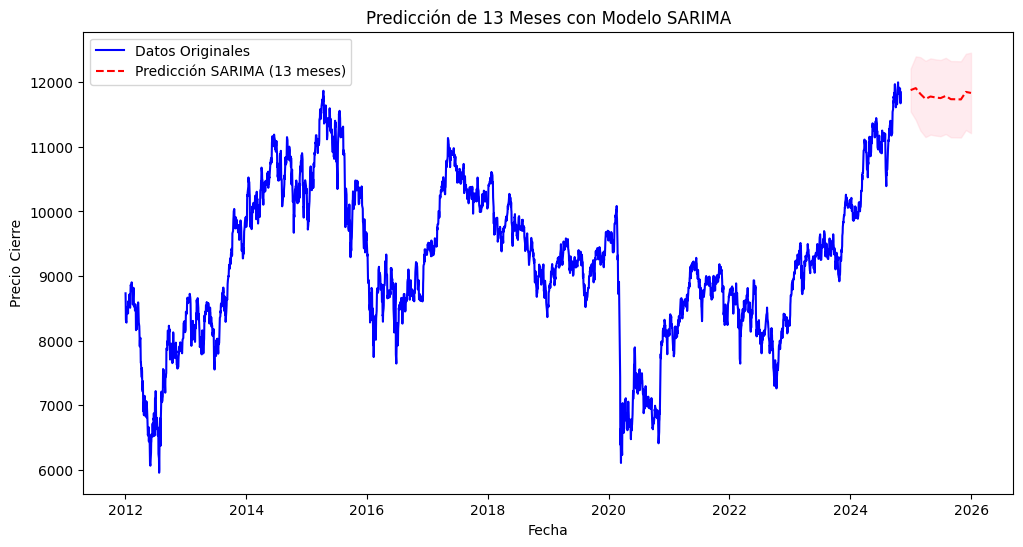

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX

# Asegúrate de que el índice de df sea un DatetimeIndex
df.index = pd.to_datetime(df.index)

# Ajustar el modelo SARIMA a todos los datos
sarima_model = SARIMAX(df['Close'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Obtener predicciones y sus intervalos de confianza para los próximos 13 meses (12 meses más el siguiente)
forecast = sarima_fit.get_forecast(steps=13)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Ajustar el índice de las predicciones a fechas futuras
forecast_values.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=13, freq='M')
confidence_intervals.index = forecast_values.index

# Graficar las predicciones de los próximos 13 meses con intervalos de confianza
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Datos Originales', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Predicción SARIMA (13 meses)', color='red', linestyle='--')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Precio Cierre')
plt.title('Predicción de 13 Meses con Modelo SARIMA')
plt.legend()
plt.show()


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


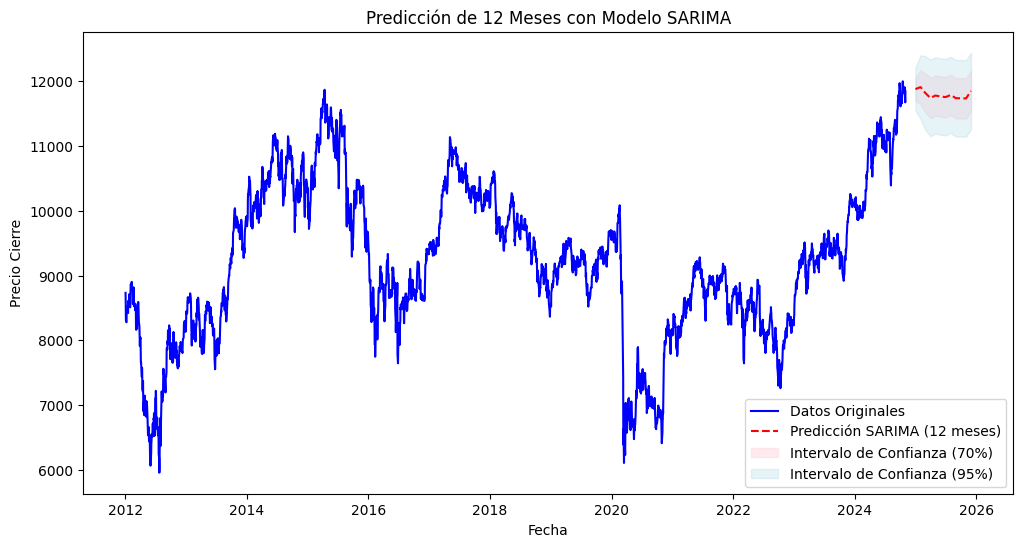

In [23]:
# Obtener los intervalos de confianza del 70% y 95%
confidence_intervals_70 = sarima_fit.get_forecast(steps=12).conf_int(alpha=0.3)
confidence_intervals_95 = sarima_fit.get_forecast(steps=12).conf_int(alpha=0.05)

# Graficar las predicciones de los próximos 12 meses con intervalo de confianza
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_12months.index, sarima_predictions_12months, label='Predicción SARIMA (12 meses)', color='red', linestyle='--')
plt.fill_between(sarima_predictions_12months.index, confidence_intervals_70.iloc[:, 0], confidence_intervals_70.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza (70%)')
plt.fill_between(sarima_predictions_12months.index, confidence_intervals_95.iloc[:, 0], confidence_intervals_95.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confianza (95%)')
plt.xlabel('Fecha')
plt.ylabel('Precio Cierre')
plt.title('Predicción de 12 Meses con Modelo SARIMA')
plt.legend()
plt.show()

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Métricas del Modelo SARIMA (Conjunto de prueba):
MSE: 2285804.25, MAE: 1200.37, RMSE: 1511.89, R²: -0.65


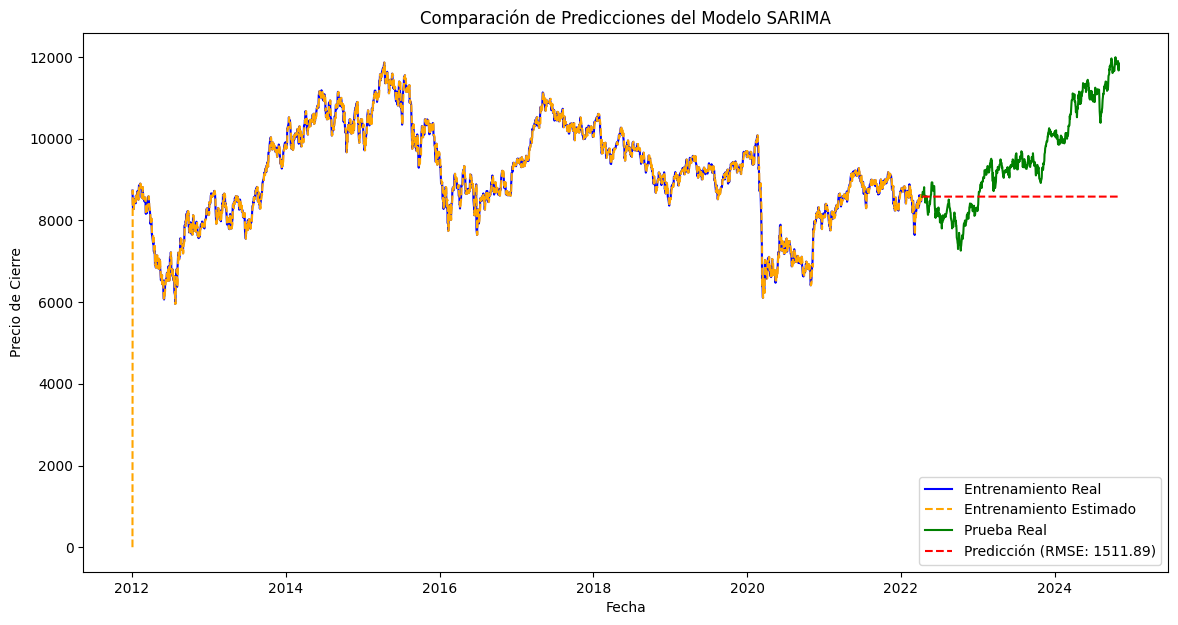

SARIMA - AIC: 32349.76, BIC: 32373.25


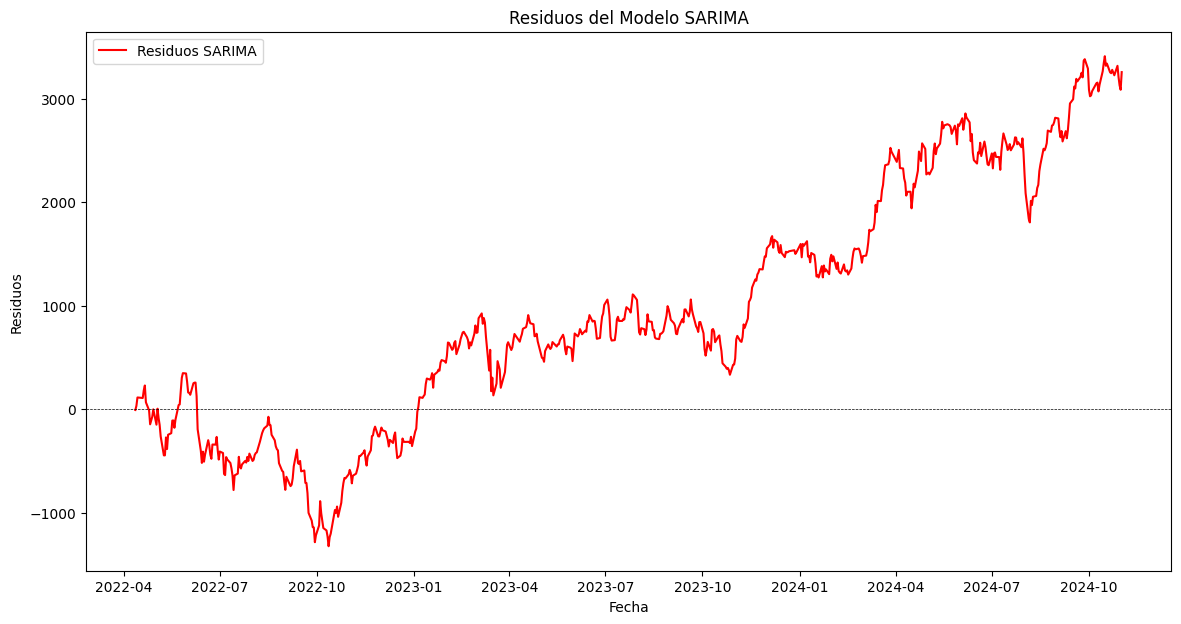

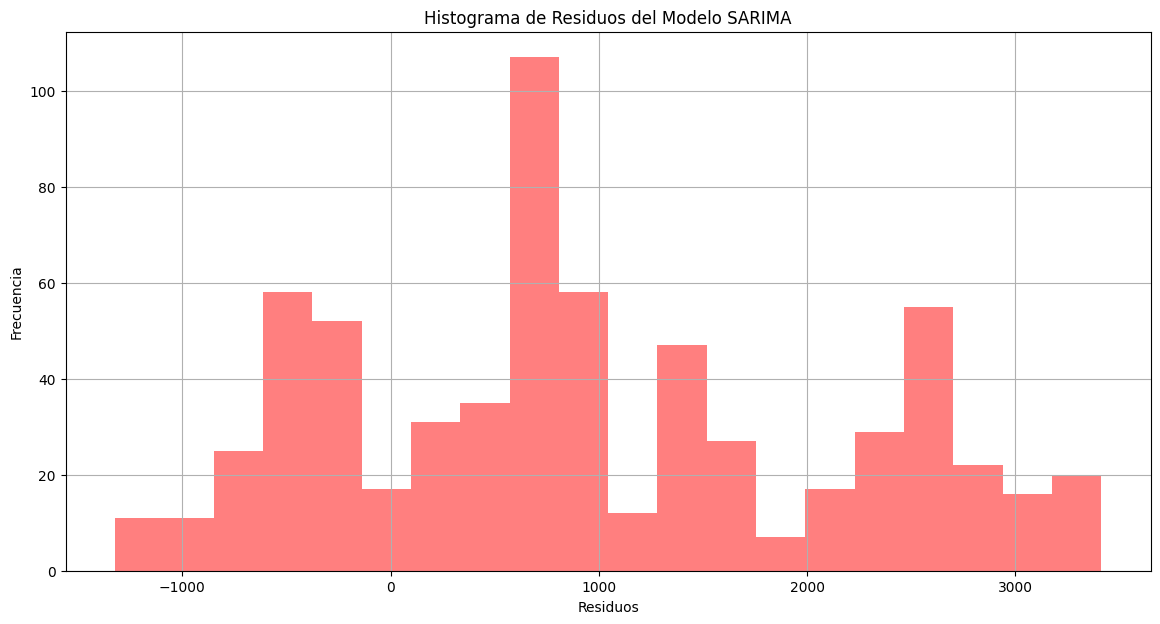

Tabla de residuos:
                Fecha  Residuos SARIMA
Date                                  
2022-04-12 2022-04-12        -6.628350
2022-04-13 2022-04-13        33.278963
2022-04-14 2022-04-14       114.561684
2022-04-19 2022-04-19       109.626602
2022-04-20 2022-04-20       185.177689
Coeficiente de determinación R² en entrenamiento: 0.97
Coeficiente de determinación R² en prueba: -0.65


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Asegúrate de que el índice de los datos sea un DatetimeIndex
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Ajustar el modelo SARIMA al conjunto de entrenamiento
sarima_model2 = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_fit2 = sarima_model2.fit()

# Predecir en el conjunto de entrenamiento y prueba usando posiciones de índices numéricos
train_predictions = sarima_fit2.predict(start=0, end=len(train)-1, typ='levels')
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Asegurarse de que las predicciones de prueba tengan el mismo índice que el conjunto de prueba
sarima_predictions2.index = test.index

# Calcular métricas de validación
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calcular métricas para el conjunto de prueba
sarima_metrics2 = calcular_metricas(test['Close'], sarima_predictions2)

# Imprimir métricas
print("Métricas del Modelo SARIMA (Conjunto de prueba):")
print(f"MSE: {sarima_metrics2[0]:.2f}, MAE: {sarima_metrics2[1]:.2f}, RMSE: {sarima_metrics2[2]:.2f}, R²: {sarima_metrics2[3]:.2f}")

# Graficar la serie de tiempo real y las predicciones
plt.figure(figsize=(14, 7))

# Graficar datos reales y predicciones en entrenamiento
plt.plot(train.index, train['Close'], label='Entrenamiento Real', color='blue')
plt.plot(train.index, train_predictions, label='Entrenamiento Estimado', linestyle='--', color='orange')

# Graficar datos reales y predicciones en prueba
plt.plot(test.index, test['Close'], label='Prueba Real', color='green')
plt.plot(test.index, sarima_predictions2, label=f'Predicción (RMSE: {sarima_metrics2[2]:.2f})', linestyle='--', color='red')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Comparación de Predicciones del Modelo SARIMA')
plt.legend()
plt.show()

# Imprimir AIC y BIC
print(f"SARIMA - AIC: {sarima_fit2.aic:.2f}, BIC: {sarima_fit2.bic:.2f}")

# Calcular y graficar los residuos
sarima_residuals2 = test['Close'] - sarima_predictions2

plt.figure(figsize=(14, 7))
plt.plot(test.index, sarima_residuals2, label='Residuos SARIMA', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo SARIMA')
plt.legend()
plt.show()

# Graficar histograma de residuos
plt.figure(figsize=(14, 7))
plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo SARIMA')
plt.grid(True)
plt.show()

# Crear DataFrame de residuos y mostrar la tabla
residuals_df = pd.DataFrame({
    'Fecha': test.index,
    'Residuos SARIMA': sarima_residuals2
})
print("Tabla de residuos:")
print(residuals_df.head())

# Imprimir R² en entrenamiento y prueba
r2_train = r2_score(train['Close'], train_predictions)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {sarima_metrics2[3]:.2f}')


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Métricas del Modelo SARIMA: (2285804.2520011347, 1200.3725341810516, 1511.8876452968107, -0.6474358310322577)


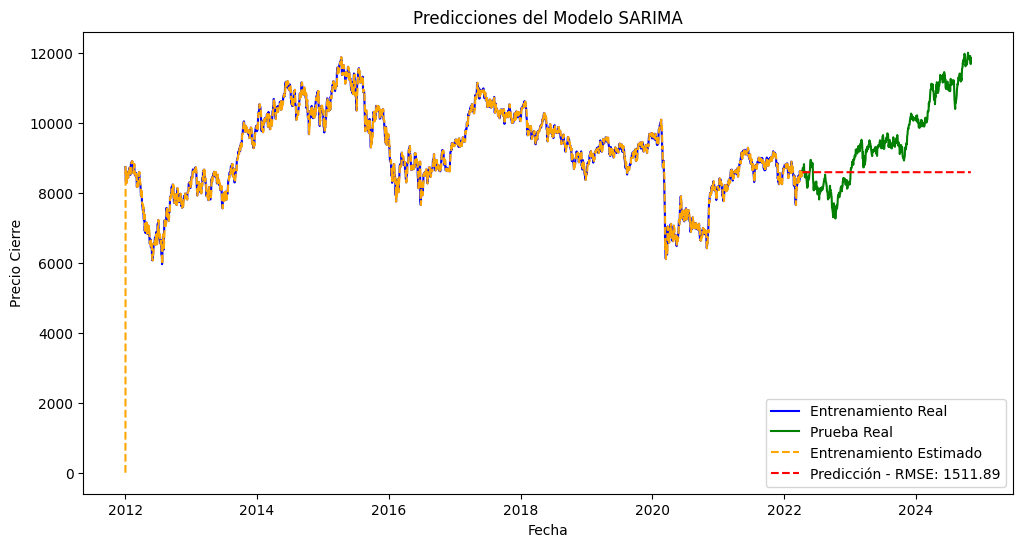

SARIMA - AIC: 32349.755068831022 BIC: 32373.246413531124


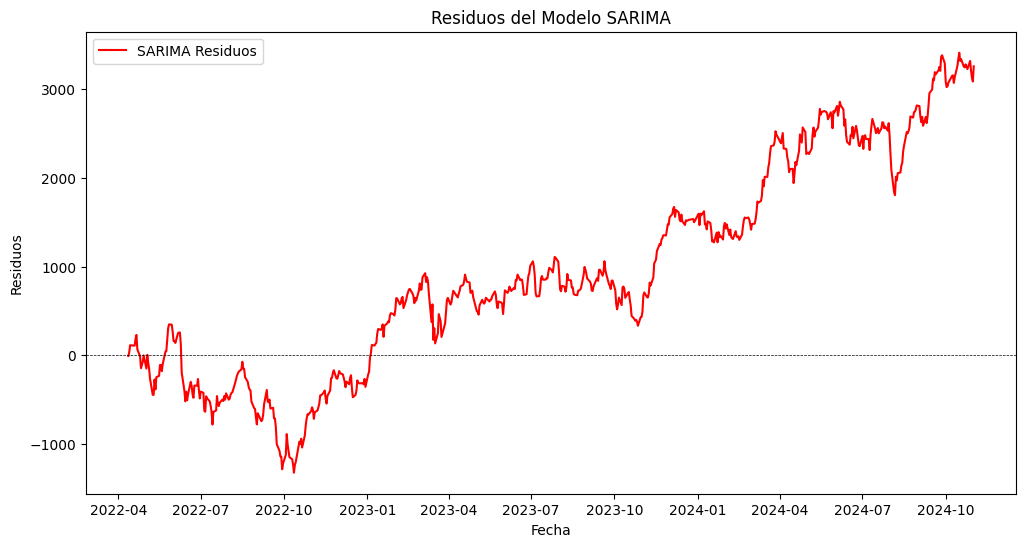

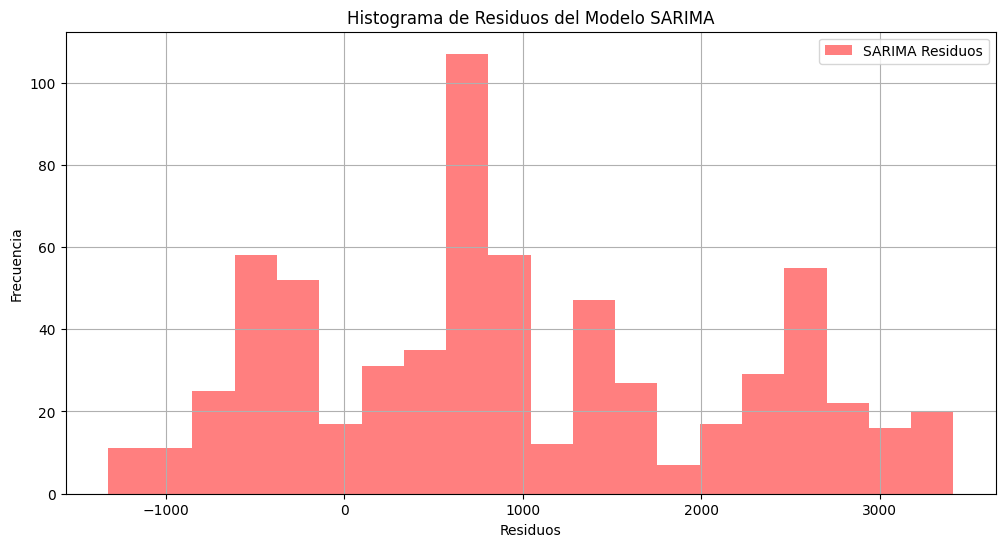

                Fecha  SARIMA Residuos
Date                                  
2022-04-12 2022-04-12        -6.628350
2022-04-13 2022-04-13        33.278963
2022-04-14 2022-04-14       114.561684
2022-04-19 2022-04-19       109.626602
2022-04-20 2022-04-20       185.177689
...               ...              ...
2024-10-28 2024-10-28      3319.866379
2024-10-29 2024-10-29      3211.166184
2024-10-30 2024-10-30      3130.866379
2024-10-31 2024-10-31      3088.465988
2024-11-01 2024-11-01      3258.866379

[657 rows x 2 columns]
Coeficiente de determinación R² en entrenamiento: 0.97
Coeficiente de determinación R² en prueba: -0.65


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ajustar el modelo SARIMA
sarima_model2 = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_fit2 = sarima_model2.fit()

# Predecir tanto en el conjunto de entrenamiento como de test para comparar el pasado real y estimado
train_predictions = sarima_fit2.predict(start=0, end=len(train) - 1, typ='levels')
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Asegurarse de que las predicciones del test tengan el mismo índice que el conjunto de prueba
sarima_predictions2.index = test.index

# Calcular los residuos (diferencia entre los valores reales y las predicciones)
sarima_residuals2 = test['Close'] - sarima_predictions2

# Función para calcular métricas de error
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calcular las métricas para el conjunto de prueba
sarima_metrics2 = calcular_metricas(test['Close'], sarima_predictions2)

# Imprimir las métricas
print("Métricas del Modelo SARIMA:", sarima_metrics2)

# Graficar los resultados: pasado real, pasado estimado y predicciones
plt.figure(figsize=(12, 6))

# Graficar la serie real del conjunto de entrenamiento y de prueba
plt.plot(train.index, train['Close'], label='Entrenamiento Real', color='blue')
plt.plot(test.index, test['Close'], label='Prueba Real', color='green')

# Graficar las predicciones del entrenamiento y prueba
plt.plot(train.index, train_predictions, label='Entrenamiento Estimado', linestyle='--', color='orange')
plt.plot(test.index, sarima_predictions2, label=f'Predicción - RMSE: {sarima_metrics2[2]:.2f}', linestyle='--', color='red')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio Cierre')
plt.title('Predicciones del Modelo SARIMA')
plt.legend()
plt.show()

# Imprimir el AIC y BIC del modelo
print("SARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)

# Obtener los residuos del modelo
sarima_residuals2 = test['Close'] - sarima_predictions2

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(test.index, sarima_residuals2, label='SARIMA Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo SARIMA')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(12, 6))
plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5, label='SARIMA Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Fecha': test.index,
    'SARIMA Residuos': sarima_residuals2
})

# Mostrar la tabla de resultados de residuos
print(residuals_df)

# Calcular y mostrar el coeficiente R²
r2_train = r2_score(train['Close'], train_predictions)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {sarima_metrics2[3]:.2f}')
